# Analysis of UQ runs - DEMO 2016 initial uncertainties VINE


## Results summary

|   | aspect | tbrnmn   | etath   | ralpne   |
|---|--------|----------|---------|----------|
| Design point | 3.32   | 17542.19 | 0.37    | 0.06857  |
| Optimised point | 2.83   | 15293.11 | 0.39    | 0.07316  |
| Delta | -0.49  | -2249.07 | 0.01863 | 0.00459 |

## Import the Uncertainty Data and create object

## Calculate Sensitivity Indices and Reliability

In [1]:
%load_ext autoreload
%autoreload 1
from pathlib import Path
from bokeh.plotting import figure, show
import sys
import pandas as pd
sys.path.append('/home/graeme/process_uq/')
sys.path.append('/home/graeme/PROCESS_SALib/')
from uq_analysis import UncertaintyData, Copula, CopulaAnalysis
# from bokeh.plotting import figure 
from bokeh.io import output_notebook
output_notebook()
proj_dir = str(Path.cwd())+"/"
proj_dir = "/home/graeme/easyVVUQ-process/demo_analysis/"
figure_of_merit = "rmajor"
input_names = [
            "coreradius",
            "ralpne",
            "psepbqarmax",
            "tbrnmn",
            "etaech",
            "pinjalw",
            "triang",
            "alstroh",
            "sig_tf_case_max",
            "walalw",
            "sig_tf_wp_max",
            "aspect",
            "etath"
        ]
uq_data = UncertaintyData(proj_dir, figure_of_merit, input_parameters = input_names, use_scoping_data=False)



Loading BokehJS ...

In [2]:
uq_data.calculate_sensitivity(figure_of_merit)
uq_data.calculate_failure_probability()
print("Number of samples: ", len(uq_data.uncertainties_df))
print("Number of converged runs: ",uq_data.number_of_converged_runs,)
print("Failure Rate: ", uq_data.failure_probability,"+/-", uq_data.failure_cov)


Number of samples:  750
Number of converged runs:  204
Failure Rate:  0.73 +/- 0.03


## Regional Sensitivity - what causes PROCESS to converge?

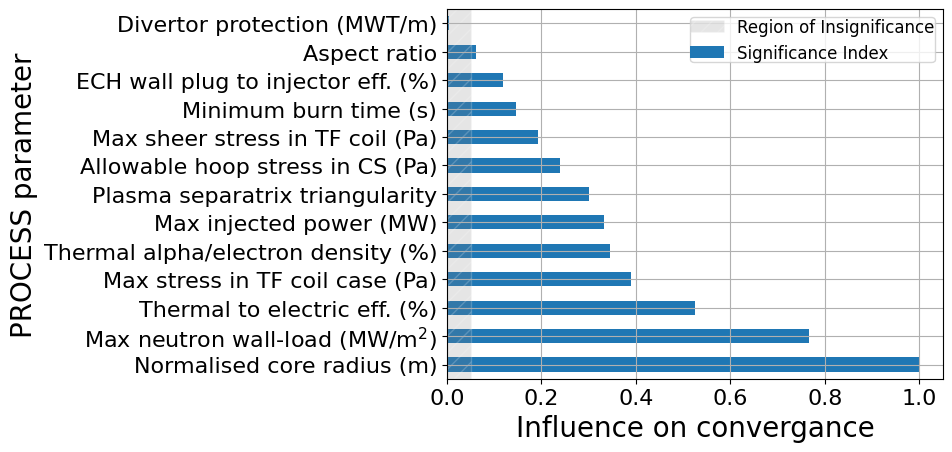

['coreradius', 'walalw', 'etath']


In [3]:
uq_data.convergence_regional_sensitivity_analysis(uq_data.input_names)
uq_data.plot_sumsq_sensitivity()
significant_conv_vars = uq_data.find_significant_parameters(uq_data.sumsq_sensitivity_df,"unconverged",0.1).tolist()
print(significant_conv_vars)

"aspect" = aspect ratio

"tbrnmn" = minimum required burn time

"etath" = electric to thermal conversion efficiency

"ralpne" = thermal alpha/electron density.

## Find the iteration variables which are influential for the significant convergence variables

/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


{'correlation': [[1.0, -0.0824720183474197, 0.16165963277736478, 0.3625239760941135], [-0.0824720183474197, 1.0, 0.2623359778543911, -0.1935665973484166], [0.16165963277736478, 0.2623359778543911, 1.0, -0.4614787512302063], [0.3625239760941135, -0.1935665973484166, -0.4614787512302063, 1.0]], 'univariates': [{'dataset': [0.6855396131384907, 0.6512316837338497, 0.7943671977037191, 0.7606140715572828, 0.7915670931474655, 0.6210566376977347, 0.8445590208999726, 0.7800517532522254, 0.679124175576081, 0.8382437976766096, 0.7265623183312808, 0.7800517532522254, 0.6246555963863013, 0.6482642182520627, 0.7281147910964232, 0.679124175576081, 0.7606140715572828, 0.7265623183312808, 0.7175789497139323, 0.7762725952091439, 0.8382437976766096, 0.679124175576081, 0.6967327059502384, 0.6512316837338497, 0.7762725952091439, 0.8445590208999726, 0.8134218726722879, 0.7943671977037191, 0.6967327059502384, 0.8920941778062376, 0.6526167465485541, 0.7119050859772191, 0.6014761950191214, 0.6433391803826849, 

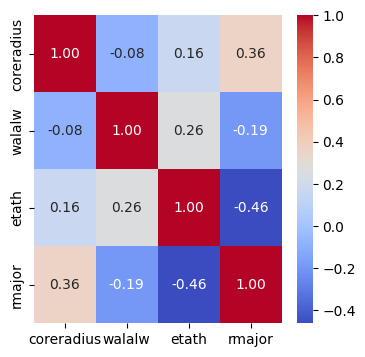

In [4]:
copula = Copula(uq_data.converged_df,significant_conv_vars+["rmajor"],copula_type="unbounded")
copula.calculate_copula(synthetic_sample_size=5000)
copula.copula_data_dict()
print(copula.copula_dict)
copula.plot_correlation_matrix(copula.copula_dict["correlation"])
# vcopula.copula.tau_mat
# correlation_df = pd.DataFrame(vcopula.copula.tau_mat,columns=significant_conv_vars+["rmajor"],index=significant_conv_vars+["rmajor"])

In [5]:
vcopula = Copula(uq_data.converged_df,significant_conv_vars+["rmajor"],copula_type="vine")
vcopula.calculate_copula(synthetic_sample_size=5000)
vcopula.copula.tau_mat
correlation_df = pd.DataFrame(vcopula.copula.tau_mat,columns=significant_conv_vars+["rmajor"],index=significant_conv_vars+["rmajor"])

/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/copulas/multivariate/vine.py:73: UserWarning: Vines have not been fully tested on Python >= 3.8 and might produce wrong results.
  warnings.warn(


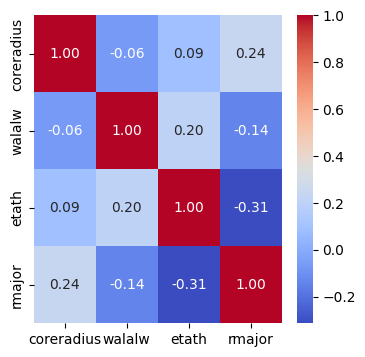

In [6]:
vcopula.plot_correlation_matrix(correlation_df)

In [7]:
custom_data = {"aspect":2.70,"etath":0.40,"tbrnmn":15000,"ralpne":0.06}
vconv_copula_analysis=CopulaAnalysis(uq_data,vcopula,num_intervals=5)#,custom_data_point=custom_data)
show(vconv_copula_analysis.create_graph_grid(significant_conv_vars))
show(vconv_copula_analysis.create_datatable(significant_conv_vars))

In [8]:
custom_data = {"aspect":2.70,"etath":0.40,"tbrnmn":15000,"ralpne":0.06}
conv_copula_analysis=CopulaAnalysis(uq_data,copula,num_intervals=5)#,custom_data_point=custom_data)
show(conv_copula_analysis.create_graph_grid(significant_conv_vars))
show(conv_copula_analysis.create_datatable(significant_conv_vars))